# Breast Cancer Detection Using Deep Learning

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

# Load the dataset and explore


In [ ]:
data = load_breast_cancer()


In [ ]:
# keys in dataset
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# featurs of each cells in numeric format
feature = data['data']

In [ ]:
# malignant or benign value
label = data['target']

In [ ]:
# target value name malignant or benign tumor
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# description of data
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# name of features
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# location/path of data file
print(data['filename'])

breast_cancer.csv


# Create the Dataframe

In [ ]:
# Create the cancer DataFrame
df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

In [ ]:
# Head of cancer DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,32.06,166.40,1688.0,0.1322,0.5601,0.3865,0.17080,0.3193,0.09221,0
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,24.13,135.10,1321.0,0.1280,0.2297,0.2623,0.13250,0.3021,0.07987,0
388,11.27,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.02757,0.1810,0.07252,...,18.93,79.73,450.0,0.1102,0.2809,0.3021,0.08272,0.2157,0.10430,1
423,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,0.06181,...,25.50,101.40,708.8,0.1147,0.3167,0.3660,0.14070,0.2744,0.08839,1
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469,1


In [ ]:
# Tail of cancer DataFrame
df.tail() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410,0
177,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,28.45,123.50,981.2,0.1415,0.4667,0.58620,0.20350,0.3054,0.09519,0
55,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,...,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036,1
526,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.3124,0.26540,0.14270,0.3518,0.08665,1
418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,16.92,88.12,566.9,0.1314,0.1607,0.09385,0.08224,0.2775,0.09464,1


In [ ]:
	
# Information of cancer Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 198 to 418
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error        

In [ ]:
# Numerical distribution of data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Data Preprocessing

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

# Data Visualization

## Pair plot of breast cancer data


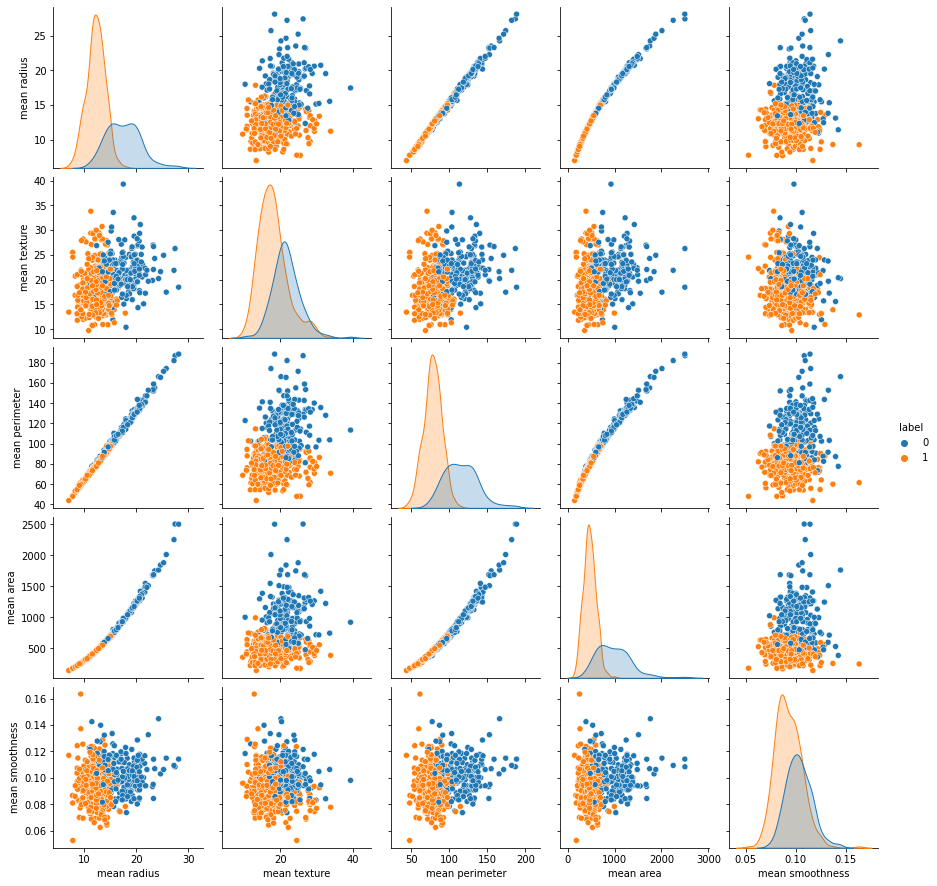

In [ ]:
# pair plot of sample feature
sns.pairplot(df, hue = 'label', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

# Counterplot

### Showing the total count of malignant and benign tumor patients in counterplot.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


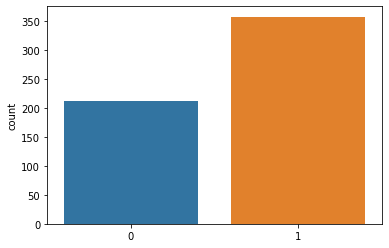

In [ ]:
# Count the target class
sns.countplot(data['target'])

# Heatmap

## Heatmap of breast Cancer dataframe

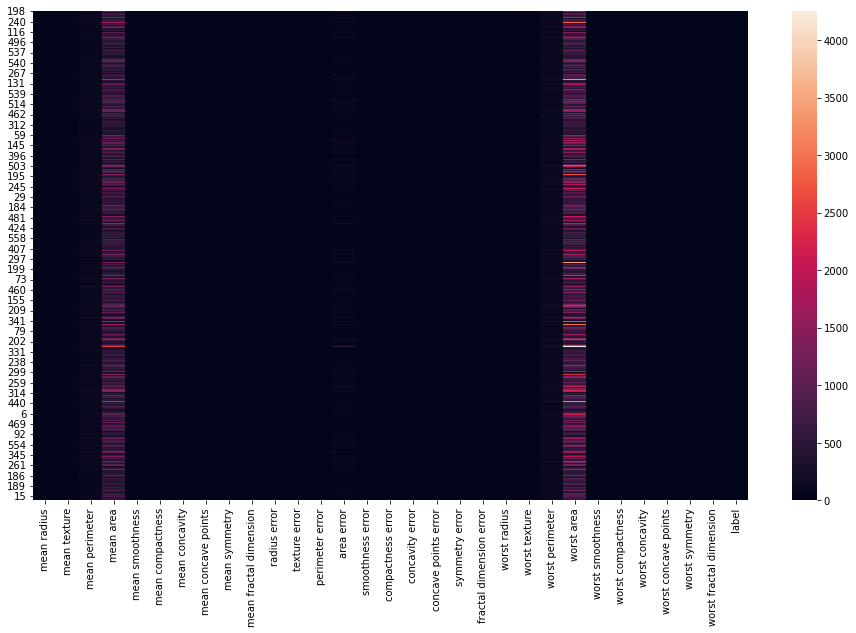

In [ ]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(df)

## Heatmap of a correlation matrix 

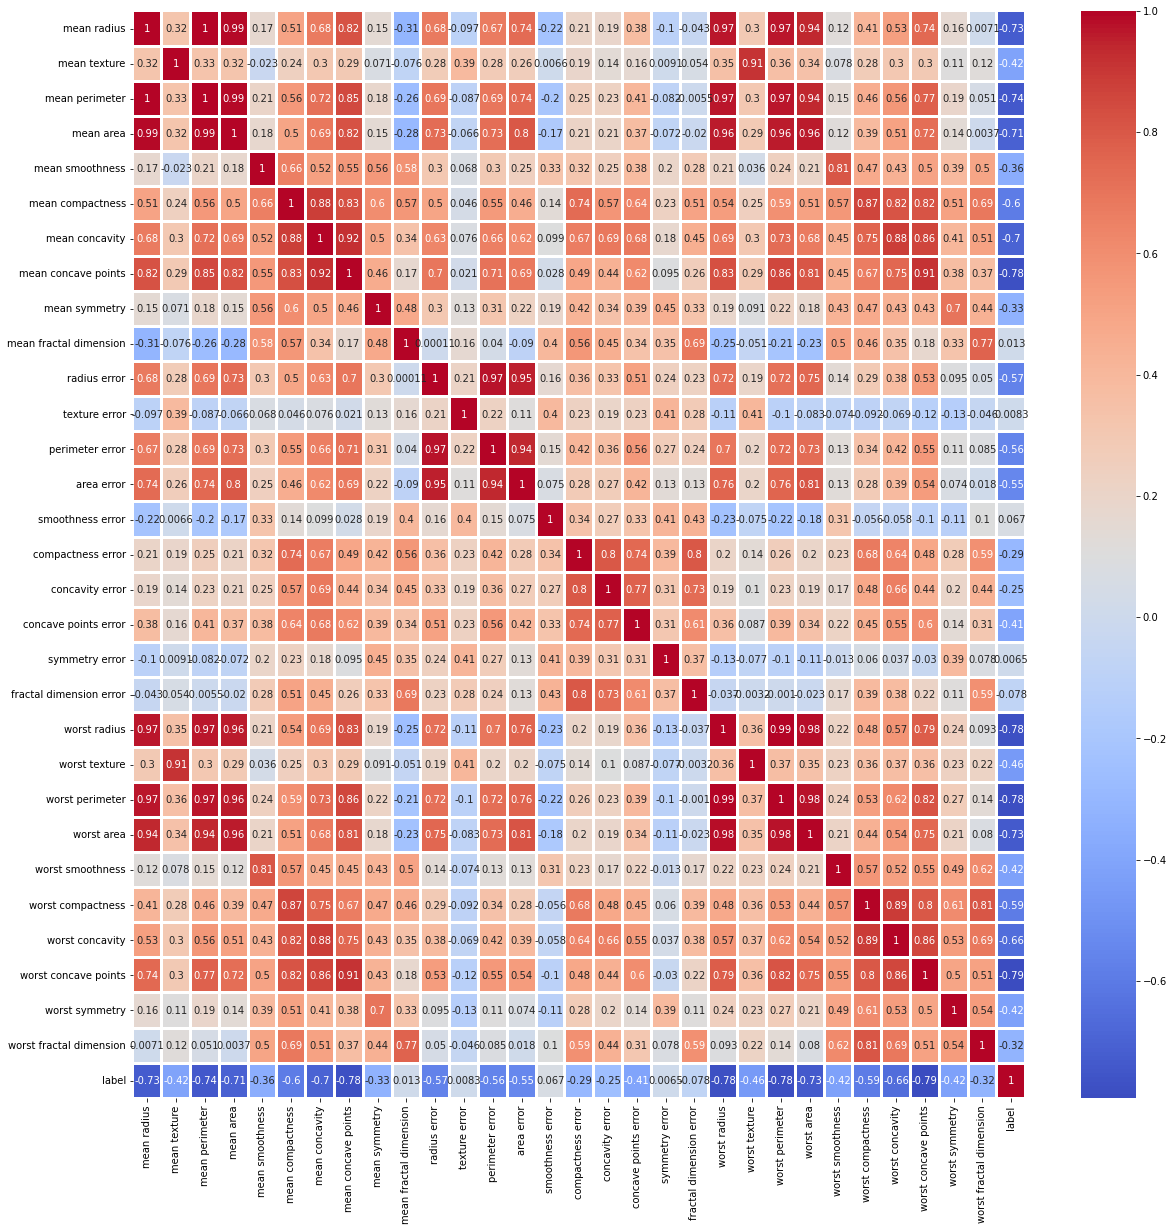

In [ ]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# Split Dataframe in training and testing

In [ ]:

#500 Training
X_train = feature[:500]
y_train = label[:500]

#35 Validation
X_val = feature[500:535]
y_val = label[500:535]

#34 Testing
X_test = feature[535:]
y_test = label[535:]



# Check the shape of feature and label

In [ ]:
print(feature.shape)
print(label.shape)

(569, 30)
(569, 1)


# Feature Scaling

In [ ]:
scale = StandardScaler()

feature = scale.fit_transform(feature)


In [ ]:
j = 0
for i in data['feature_names']:
  print(i,":",feature[0][j])
  j+=1

mean radius : 1.43504087489285
mean texture : 0.7447432754452142
mean perimeter : 1.4635276292618702
mean area : 1.4024579890084112
mean smoothness : -0.7920913802945144
mean compactness : 0.7288552464177952
mean concavity : 0.28375093679971825
mean concave points : 0.4849488991866189
mean symmetry : -0.16290008961640737
mean fractal dimension : -1.0642818174003266
radius error : 0.11018176051388771
texture error : -0.2609995874965648
perimeter error : 0.4786652814862737
area error : 0.30544799489788294
smoothness error : -0.5056801392345187
compactness error : 0.6428337228425743
concavity error : -0.16027164371649918
concave points error : 0.06713256542506814
symmetry error : -0.7739699693562344
fractal dimension error : -0.15050767150324232
worst radius : 1.4683829145800658
worst texture : 1.039395574339657
worst perimeter : 1.761498364348141
worst area : 1.4193683819472578
worst smoothness : -0.007390469344351967
worst compactness : 1.945537622567575
worst concavity : 0.548412190789

# Breast Cancer Detection Machine Learning Model Building

In [ ]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 30))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
history = model.fit( X_train , y_train, epochs = 10, batch_size = 5, validation_data = (X_val, y_val))
model.evaluate(X_test , y_test)
model.evaluate(X_val , y_val)
y_pred = model.predict(X_test)

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.2690 - accuracy: 0.8940 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9720 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9840 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9820 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9860 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 8.8237e-04 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 9.0539e-04 - val_accuracy: 1.000

In [ ]:
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("-Benign")
  else:
    print("-Malignant")

  if (y_test[i] == 1):
    print("*Banign")
  else:
    print("*Melignant")
  print("-----------")



-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Melignant
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Malignant
*Melignant
-----------


In [ ]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]]


score is: 0.9411764705882353


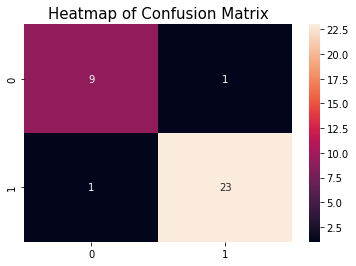

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

<function matplotlib.pyplot.show>

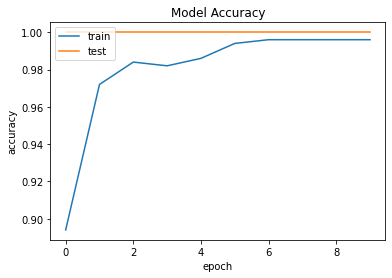

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

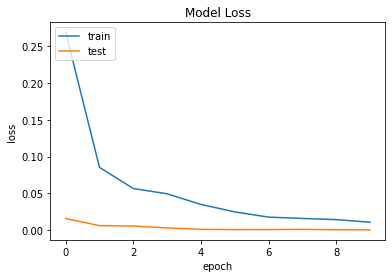

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show